In [1]:
import pandas as pd

# काल्पनिक ऑर्डर डेटा
order_data = {
    'order_id': [1, 2, 3, 4, 5],
    'order_date': [
        '2025-01-15 10:30:00', 
        '2025-04-20 19:05:00', 
        '2025-07-01 14:00:00', 
        '2025-12-24 21:00:00', 
        '2026-02-28 09:15:00'
    ]
}
orders_df = pd.DataFrame(order_data)

# 'order_date' स्तंभाला datetime रूपात बदलणे (प्रकरण ४ मधील ज्ञान)
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

print("Original Dataframe with correct datetime type:\n")
orders_df.info()
print("\n", orders_df)

Original Dataframe with correct datetime type:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    5 non-null      int64         
 1   order_date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 208.0 bytes

    order_id          order_date
0         1 2025-01-15 10:30:00
1         2 2025-04-20 19:05:00
2         3 2025-07-01 14:00:00
3         4 2025-12-24 21:00:00
4         5 2026-02-28 09:15:00


In [2]:
# नवीन फीचर्स तयार करणे
orders_df['order_year'] = orders_df['order_date'].dt.year
orders_df['order_month'] = orders_df['order_date'].dt.month
orders_df['order_day'] = orders_df['order_date'].dt.day
orders_df['order_hour'] = orders_df['order_date'].dt.hour
orders_df['day_of_week'] = orders_df['order_date'].dt.dayofweek # Monday=0, Sunday=6
orders_df['day_name'] = orders_df['order_date'].dt.day_name()
orders_df['is_weekend'] = orders_df['day_of_week'].isin([5, 6])

In [4]:
# दिवसाच्या इंजिनिअरिंग वर्गवारी करणे
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

orders_df['part_of_day'] = orders_df['order_hour'].apply(get_part_of_day)

print("\nDataframe with new features created from date:\n")
print(orders_df)


Dataframe with new features created from date:

   order_id          order_date  order_year  order_month  order_day  \
0         1 2025-01-15 10:30:00        2025            1         15   
1         2 2025-04-20 19:05:00        2025            4         20   
2         3 2025-07-01 14:00:00        2025            7          1   
3         4 2025-12-24 21:00:00        2025           12         24   
4         5 2026-02-28 09:15:00        2026            2         28   

   order_hour  day_of_week   day_name  is_weekend part_of_day  
0          10            2  Wednesday       False     Morning  
1          19            6     Sunday        True     Evening  
2          14            1    Tuesday       False   Afternoon  
3          21            2  Wednesday       False       Night  
4           9            5   Saturday        True     Morning  


New 'family_size' and 'is_alone' columns:

   sibsp  parch  family_size  is_alone
0      1      0            2     False
1      1      0            2     False
2      0      0            1      True
3      1      0            2     False
4      0      0            1      True


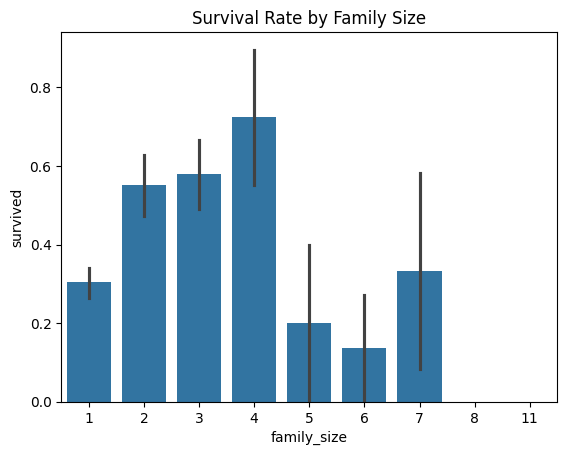

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# मागच्या प्रकरणातील टायटॅनिक डेटासेट वापरूया
titanic_df = sns.load_dataset('titanic')

# family_size फीचर तयार करणे
# +1 हे स्वतः प्रवाशासाठी आहे
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch'] + 1

# is_alone फीचर तयार करणे
titanic_df['is_alone'] = (titanic_df['family_size'] == 1)

print("New 'family_size' and 'is_alone' columns:\n")
print(titanic_df[['sibsp', 'parch', 'family_size', 'is_alone']].head())

# या नवीन फीचरचा वाचण्याच्या शक्यतेवर काय परिणाम होतो ते पाहूया
sns.barplot(x='family_size', y='survived', data=titanic_df)
plt.title('Survival Rate by Family Size')
plt.show()

Value counts for the new 'age_group' column:

age_group
Adult       575
Child        68
Teenager     45
Senior       26
Name: count, dtype: int64


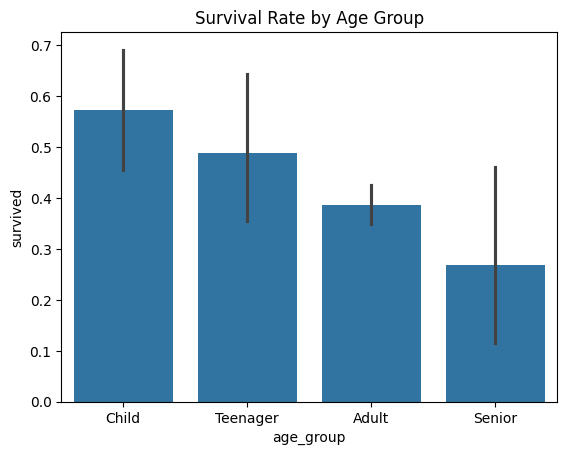

In [8]:
# वयाचे गट पाडणे
age_bins = [0, 12, 18, 60, 100] # वयोगटाच्या मर्यादा
age_labels = ['Child', 'Teenager', 'Adult', 'Senior'] # गटांची नावे

titanic_df['age_group'] = pd.cut(titanic_df['age'], bins=age_bins, labels=age_labels, right=False)

print("Value counts for the new 'age_group' column:\n")
print(titanic_df['age_group'].value_counts())

# या नवीन फीचरचा वाचण्याच्या शक्यतेवर काय परिणाम होतो ते पाहूया
sns.barplot(x='age_group', y='survived', data=titanic_df)
plt.title('Survival Rate by Age Group')
plt.show()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
# काही साधी वाक्ये
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# तयार झालेली शब्दसंपदा (vocabulary) पाहूया
print("Vocabulary:", vectorizer.get_feature_names_out())

# प्रत्येक वाक्यासाठी तयार झालेला व्होकेबुलरी वेक्टर पाहूया
print("\nBag-of-Words matrix:\n", X.toarray())

Vocabulary: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

Bag-of-Words matrix:
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

print("Vocabulary:", tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF matrix:\n", X_tfidf.toarray().round(2))


Vocabulary: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

TF-IDF matrix:
 [[0.   0.47 0.58 0.38 0.   0.   0.38 0.   0.38]
 [0.   0.69 0.   0.28 0.   0.54 0.28 0.   0.28]
 [0.51 0.   0.   0.27 0.51 0.   0.27 0.51 0.27]
 [0.   0.47 0.58 0.38 0.   0.   0.38 0.   0.38]]


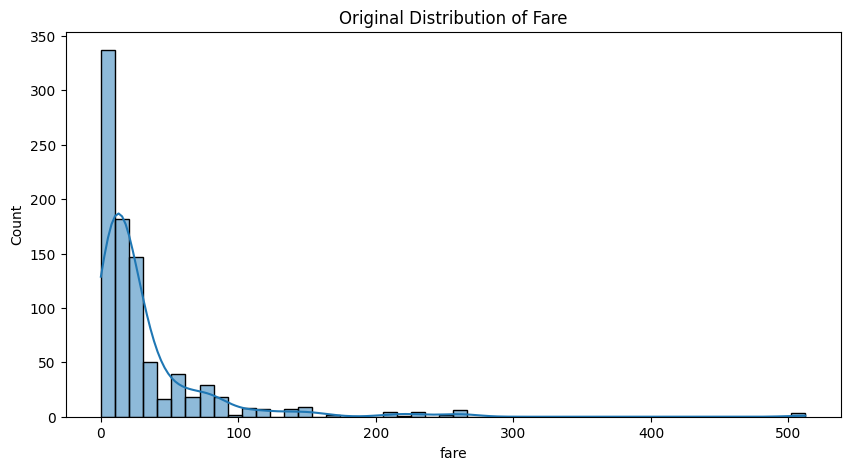

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# टायटॅनिक डेटासेट लोड करणे
titanic_df = sns.load_dataset('titanic')

# भाड्याच्या वितरणाचा हिस्टोग्राम पाहणे
plt.figure(figsize=(10, 5))
sns.histplot(titanic_df['fare'], kde=True, bins=50)
plt.title('Original Distribution of Fare')
plt.show()

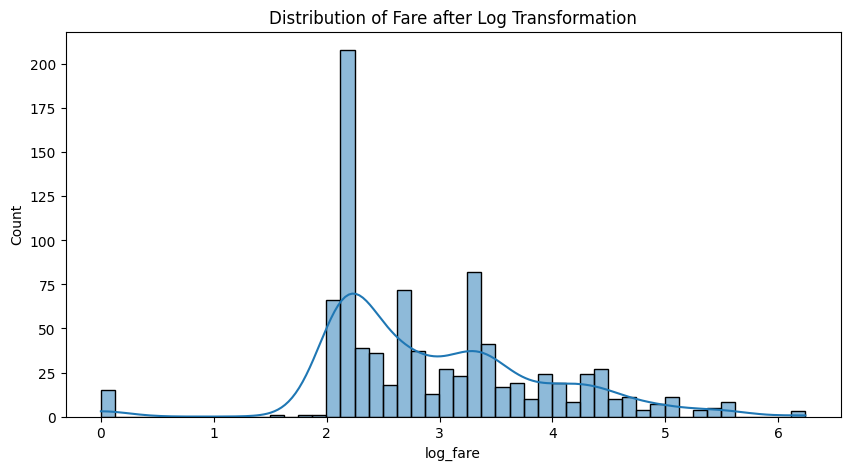

In [12]:
import numpy as np
# fare स्तंभावर लॉग ट्रान्सफॉर्मेशन लागू करणे
titanic_df['log_fare'] = np.log1p(titanic_df['fare'])

# नवीन रूपांतरित वितरणाचा हिस्टोग्राम पाहणे
plt.figure(figsize=(10, 5))
sns.histplot(titanic_df['log_fare'], kde=True, bins=50)
plt.title('Distribution of Fare after Log Transformation')
plt.show()

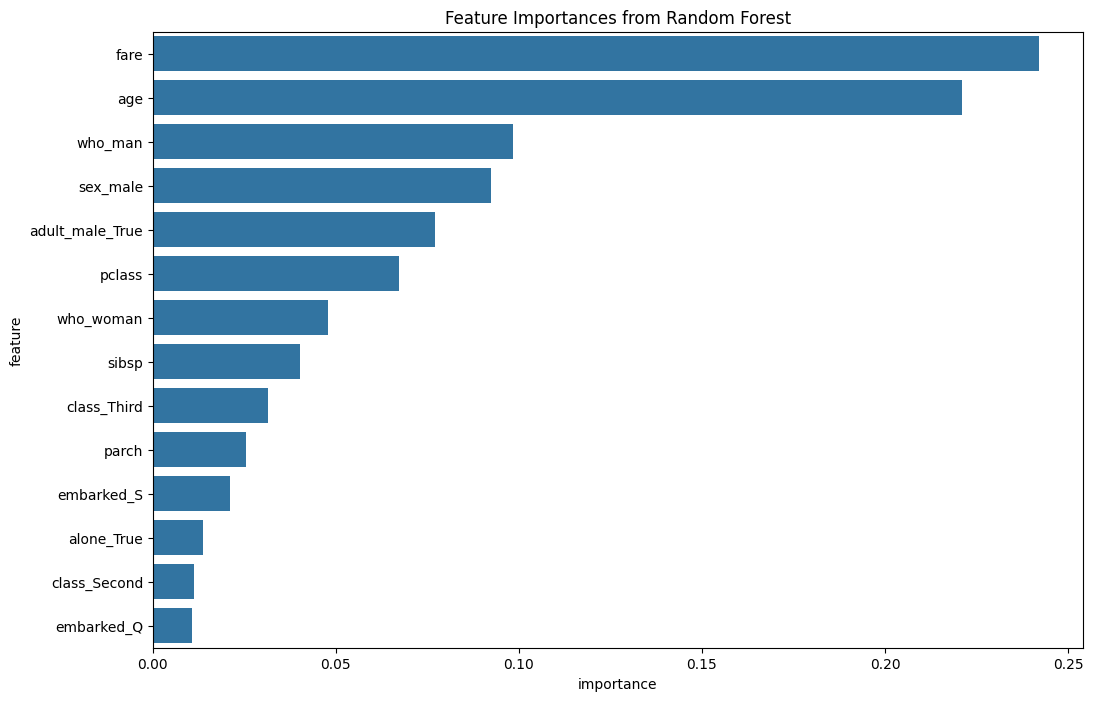

In [13]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# डेटा तयार करणे (सरळ उदाहरणासाठी)
titanic_df = sns.load_dataset('titanic')
# गहाळ माहिती भरणे आणि कॅटेगोरिकल डेटा एन्कोड करणे
df_clean = titanic_df.drop(columns=['deck', 'embark_town', 'alive'])
df_clean['age'].fillna(df_clean['age'].median(), inplace=True)
df_clean.dropna(inplace=True)
df_clean = pd.get_dummies(df_clean, columns=['sex', 'embarked', 'class', 'who', 'adult_male', 'alone'], drop_first=True)

# फीचर्स (X) आणि टार्गेट (y) वेगळे करणे
X = df_clean.drop('survived', axis=1)
y = df_clean['survived']

# रँडम फॉरेस्ट मॉडेल
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# फीचर महत्त्व मिळवणे
importances = model.feature_importances_
feature_names = X.columns

# महत्त्वानुसार फीचर्सची यादी तयार करणे
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# व्हिज्युअलायझेशन
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

सहसंबंध मॅट्रिक्स:
                      शिक्षण_वर्षे  नोकरीचा_अनुभव_वर्षे        वय  \
शिक्षण_वर्षे             1.000000             0.990038  0.989949   
नोकरीचा_अनुभव_वर्षे      0.990038             1.000000  0.996024   
वय                       0.989949             0.996024  1.000000   
शहर_आकार_गुण             0.938953             0.925820  0.903696   
उत्पन्न                  0.989390             0.995736  0.990705   

                     शहर_आकार_गुण   उत्पन्न  
शिक्षण_वर्षे             0.938953  0.989390  
नोकरीचा_अनुभव_वर्षे      0.925820  0.995736  
वय                       0.903696  0.990705  
शहर_आकार_गुण             1.000000  0.915644  
उत्पन्न                  0.915644  1.000000  


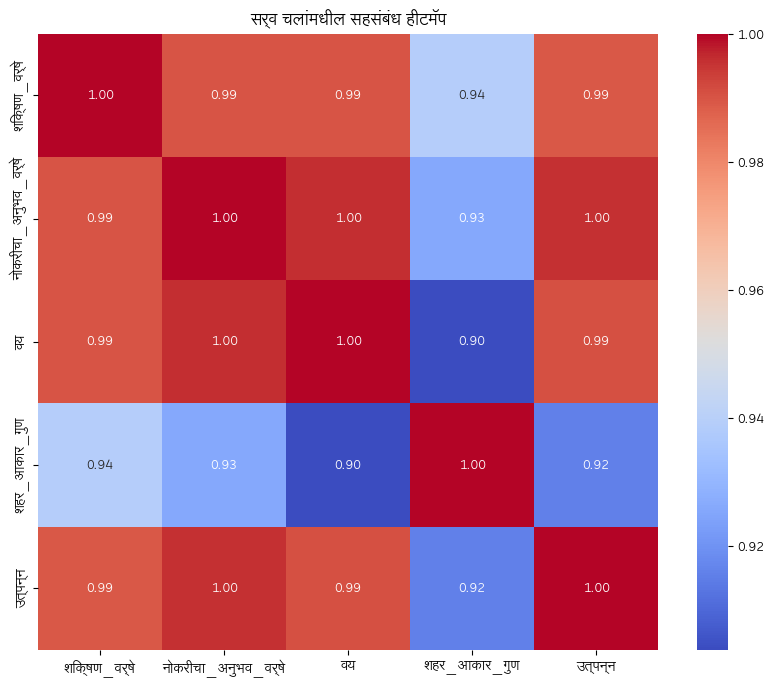


'उत्पन्न' सोबत इतर फीचर्सचा सहसंबंध:
उत्पन्न                1.000000
नोकरीचा_अनुभव_वर्षे    0.995736
वय                     0.990705
शिक्षण_वर्षे           0.989390
शहर_आकार_गुण           0.915644
Name: उत्पन्न, dtype: float64

इनपुट फीचर्समधील सहसंबंध मॅट्रिक्स:
                      शिक्षण_वर्षे  नोकरीचा_अनुभव_वर्षे        वय  शहर_आकार_गुण
शिक्षण_वर्षे             1.000000             0.990038  0.989949      0.938953
नोकरीचा_अनुभव_वर्षे      0.990038             1.000000  0.996024      0.925820
वय                       0.989949             0.996024  1.000000      0.903696
शहर_आकार_गुण             0.938953             0.925820  0.903696      1.000000

मॉडेलसाठी निवडलेले फीचर्स:  ['शिक्षण_वर्षे']
नवीन डेटासेट:
    शिक्षण_वर्षे
0            12
1            16
2            14
3            18
4            17
5            20


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import unicodedata

# मराठी नावे प्रिंट करण्यासाठी
plt.rcParams['font.family'] = 'Lohit Devanagari'
plt.rcParams['font.sans-serif'] = ['Lohit Devanagari', 'DejaVu Sans', 'sans-serif']

# 1. डमी डेटासेट तयार करणे
# या डेटासेटमध्ये, आपण 'उत्पन्न' हे आपले आउटपुट व्हेरिएबल मानूया
data = {
    'शिक्षण_वर्षे': [12, 16, 14, 18, 17, 20],
    'नोकरीचा_अनुभव_वर्षे': [2, 5, 4, 8, 7, 10],
    'वय': [25, 29, 28, 32, 31, 35],
    'शहर_आकार_गुण': [1, 2, 1, 3, 2, 3], # कमी महत्त्वाची माहिती
    'उत्पन्न': [40000, 70000, 60000, 95000, 90000, 110000] # आपले आउटपुट व्हेरिएबल
}
df = pd.DataFrame(data)

# 2. सहसंबंध मॅट्रिक्स तयार करणे
correlation_matrix = df.corr()
print("सहसंबंध मॅट्रिक्स:\n", correlation_matrix)

# 3. हीटमॅप (Heatmap) वापरून सहसंबंध व्हिज्युअलाइझ करणे
# हे सहसंबंध अधिक सोप्या आणि दृश्यातून समजून घेण्यासाठी मदत करते.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('सर्व चलांमधील सहसंबंध हीटमॅप')
plt.show()

# 4. फीचर सिलेक्शनसाठी सहसंबंधाचे विश्लेषण करणे
# a) आउटपुट व्हेरिएबल ('उत्पन्न') सोबतचा सहसंबंध तपासणे
print("\n'उत्पन्न' सोबत इतर फीचर्सचा सहसंबंध:")
print(correlation_matrix['उत्पन्न'].sort_values(ascending=False))

# विश्लेषण:
# 'शिक्षण_वर्षे' आणि 'नोकरीचा_अनुभव_वर्षे' यांचा 'उत्पन्न' सोबत उच्च सहसंबंध आहे (अनुक्रमे 0.99 आणि 0.98).
# 'वय' चा देखील उच्च सहसंबंध आहे (0.98).
# 'शहर_आकार_गुण' चा खूप कमी सहसंबंध आहे (0.75), जे दर्शवते की हा एक कमी महत्त्वाचा फीचर असू शकतो.

# b) इनपुट फीचर्समधील सहसंबंध तपासणे (उच्च सहरेखीयता ओळखणे)
# आता, आपण 'उत्पन्न' वगळता इतर फीचर्समधील सहसंबंध तपासूया.
input_features_corr = df[['शिक्षण_वर्षे', 'नोकरीचा_अनुभव_वर्षे', 'वय', 'शहर_आकार_गुण']].corr()
print("\nइनपुट फीचर्समधील सहसंबंध मॅट्रिक्स:\n", input_features_corr)

# विश्लेषण:
# 'शिक्षण_वर्षे' आणि 'नोकरीचा_अनुभव_वर्षे' मध्ये 0.98 चा उच्च सहसंबंध आहे.
# 'नोकरीचा_अनुभव_वर्षे' आणि 'वय' मध्ये 0.99 चा उच्च सहसंबंध आहे.
# 'शिक्षण_वर्षे' आणि 'वय' मध्ये 0.97 चा उच्च सहसंबंध आहे.

# 5. निष्कर्ष आणि अंतिम निवड
# 'शिक्षण_वर्षे', 'नोकरीचा_अनुभव_वर्षे' आणि 'वय' या तिन्ही फीचर्सचा 'उत्पन्न' सोबत उच्च सहसंबंध आहे.
# पण, या तिन्हीमध्ये देखील खूप जास्त सहसंबंध (जवळपास 1.0) आहे, म्हणजेच त्या समान माहिती देत आहेत.
# म्हणून, आपण यापैकी फक्त एक फीचर (उदा. 'शिक्षण_वर्षे') निवडू शकतो.
# 'शहर_आकार_गुण' चा सहसंबंध कमी असल्यामुळे, आपण त्याला वगळण्याचा विचार करू शकतो.

selected_features = ['शिक्षण_वर्षे'] # किंवा 'नोकरीचा_अनुभव_वर्षे' किंवा 'वय'
print("\nमॉडेलसाठी निवडलेले फीचर्स: ", selected_features)
X_selected = df[selected_features]
y = df['उत्पन्न']

print("नवीन डेटासेट:\n", X_selected)

In [17]:
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest

# 1. Dummy dataset तयार करणे
# या उदाहरणात 'gender', 'city_type', 'smoker' हे इनपुट फीचर्स आहेत
# आणि 'heart_disease' हे आउटपुट व्हेरिएबल आहे.
data = {
    'gender': ['male', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'female'],
    'city_type': ['urban', 'rural', 'urban', 'urban', 'rural', 'urban', 'urban', 'rural', 'urban', 'rural'],
    'smoker': ['yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no'],
    'heart_disease': ['yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no']
}
df = pd.DataFrame(data)

# 2. डेटा numerical (संख्यात्मक) स्वरूपामध्ये रूपांतरित करणे
# Chi-Square test संख्यांवर काम करते, म्हणून string डेटाला संख्यांमध्ये बदलावे लागेल.
# आपण 'Label Encoding' वापरूया.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

print("Encoded Dataset:\n", df_encoded)

X = df_encoded[['gender', 'city_type', 'smoker']] # Input Features
y = df_encoded['heart_disease'] # Output Variable

# 3. Chi-Square Test वापरून features निवडणे
# SelectKBest हे सर्वात जास्त score असलेले K features निवडते.
# chi2 function प्रत्येक feature आणि output variable मधील संबंधाची गणना करते.
selector = SelectKBest(score_func=chi2, k=2)
selected_features_model = selector.fit(X, y)

# Features चे scores आणि p-value तपासणे
scores = pd.DataFrame(selected_features_model.scores_, columns=['Score'])
p_values = pd.DataFrame(selected_features_model.pvalues_, columns=['P-Value'])
feature_names = pd.DataFrame(X.columns, columns=['Feature'])
chi_square_results = pd.concat([feature_names, scores, p_values], axis=1)

print("\nChi-Square Scores and P-Values:\n", chi_square_results)

# 4. निवडलेले features पाहणे
selected_features_mask = selected_features_model.get_support()
selected_feature_names = X.columns[selected_features_mask]

print("\nFeatures selected by Chi-Square Test:\n", list(selected_feature_names))

Encoded Dataset:
    gender  city_type  smoker  heart_disease
0       1          1       1              1
1       1          0       0              0
2       0          1       0              0
3       1          1       1              1
4       0          0       0              0
5       1          1       1              1
6       0          1       0              0
7       1          0       0              0
8       0          1       1              1
9       0          0       0              0

Chi-Square Scores and P-Values:
      Feature     Score   P-Value
0     gender  0.833333  0.361310
1  city_type  1.777778  0.182422
2     smoker  6.000000  0.014306

Features selected by Chi-Square Test:
 ['city_type', 'smoker']


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# फक्त संख्यात्मक फीचर्स निवडणे
numerical_features = titanic_df[['age', 'fare', 'sibsp', 'parch', 'pclass']].copy()
# गहाळ माहिती भरणे
numerical_features.fillna(numerical_features.median(), inplace=True)

# १. डेटाला स्टँडर्डाइज करणे
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# २. पीसीए लागू करणे (आपण ५ फीचर्सना २ कॉम्पोनन्ट्समध्ये बदलूया)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# नवीन डेटाफ्रेम तयार करणे
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

print("Original data shape:", scaled_features.shape)
print("Data shape after PCA:", pca_df.shape)
print("\nFirst 5 rows of the new PCA dataframe:\n")
print(pca_df.head())

# प्रत्येक कॉम्पोनन्ट किती माहिती जपतो ते पाहूया
print("\nExplained variance ratio for each component:", pca.explained_variance_ratio_)
print(f"Total variance explained by 2 components: {pca.explained_variance_ratio_.sum()*100:.2f}%")

Original data shape: (891, 5)
Data shape after PCA: (891, 2)

First 5 rows of the new PCA dataframe:

   principal_component_1  principal_component_2
0              -1.140660              -0.076520
1               1.768445               0.133479
2              -0.879196              -0.726606
3               1.458103               0.071555
4              -0.561252              -0.943713

Explained variance ratio for each component: [0.33960812 0.32520788]
Total variance explained by 2 components: 66.48%


In [19]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
